<a href="https://colab.research.google.com/github/nknigam/MachineLearning/blob/master/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [26]:
#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['root', 'sbin', 'media', 'var', 'etc', 'proc', 'sys', 'opt', 'dev', 'usr', 'mnt', 'run', 'bin', 'lib64', 'tmp', 'boot', 'home', 'srv', 'lib', 'content', '.dockerenv', 'datalab', 'tools', 'swift', 'tensorflow-1.15.2', 'lib32']
/content: ['.config', 'HDFCBANK.csv', 'sample_data']


# Analyze HDFC Bank daily Stock price

In [35]:
df = pd.read_csv("HDFCBANK.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5184 non-null   object 
 1   Symbol              5184 non-null   object 
 2   Series              5184 non-null   object 
 3   Prev Close          5184 non-null   float64
 4   Open                5184 non-null   float64
 5   High                5184 non-null   float64
 6   Low                 5184 non-null   float64
 7   Last                5184 non-null   float64
 8   Close               5184 non-null   float64
 9   VWAP                5184 non-null   float64
 10  Volume              5184 non-null   int64  
 11  Turnover            5184 non-null   float64
 12  Trades              2334 non-null   float64
 13  Deliverable Volume  4675 non-null   float64
 14  %Deliverble         4675 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 607.6

In [28]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5179,2020-10-26,HDFCBANK,EQ,1235.8,1229.80,1242.00,1204.60,1216.55,1210.90,1222.29,9786023,1.196138e+15,197782.0,4286264.0,0.4380
5180,2020-10-27,HDFCBANK,EQ,1210.9,1226.00,1236.00,1197.85,1235.00,1233.10,1216.83,12158922,1.479529e+15,207342.0,5566363.0,0.4578
5181,2020-10-28,HDFCBANK,EQ,1233.1,1228.00,1232.00,1201.50,1210.30,1209.60,1214.22,8285625,1.006059e+15,202965.0,3816626.0,0.4606
5182,2020-10-29,HDFCBANK,EQ,1209.6,1200.60,1204.45,1178.50,1190.50,1187.20,1189.63,11530152,1.371666e+15,207330.0,4599106.0,0.3989
5183,2020-10-30,HDFCBANK,EQ,1187.2,1182.55,1199.30,1176.35,1182.40,1183.55,1186.31,5761470,6.834879e+14,137766.0,1417497.0,0.2460


In [29]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5.184000e+03,5.184000e+03,2334.000000,4.675000e+03,4675.000000
mean,996.597290,996.897955,1009.320679,983.409587,996.805883,996.795235,996.390808,1.901490e+06,2.144259e+14,74504.353042,1.164452e+06,0.598526
std,639.324343,638.966383,644.991685,633.027057,639.254264,639.223311,639.020034,3.744284e+06,4.317437e+14,86516.143550,1.975154e+06,0.120262
min,157.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10,807.000000,4.631000e+03,0.177900
25%,468.312500,469.875000,475.600000,461.875000,470.000000,469.112500,468.962500,2.917712e+05,1.505309e+13,26230.750000,2.551265e+05,0.524900
50%,911.600000,915.025000,930.825000,893.325000,912.200000,911.750000,911.855000,9.077695e+05,1.109204e+14,41848.500000,6.098440e+05,0.604300
75%,1384.362500,1390.000000,1409.450000,1360.000000,1388.100000,1384.362500,1384.995000,2.008752e+06,2.051019e+14,86674.750000,1.331341e+06,0.676200
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16,790631.000000,6.669683e+07,1.000000


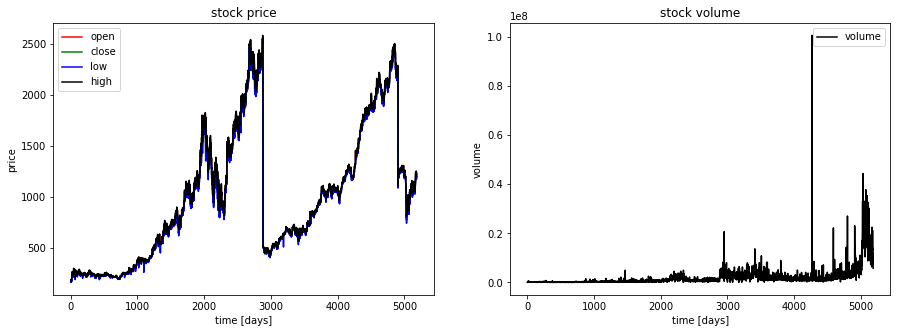

In [36]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df['Open'].values, color='red', label='open')
plt.plot(df['Close'].values, color='green', label='close')
plt.plot(df['Low'].values, color='blue', label='low')
plt.plot(df['High'].values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df['Volume'].values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

# Manipulate Data


1.   Drop features: Deliverable Volume,	%Deliverble
2.   Normalize Stock data
3.   Create train, validation and test dataset







In [31]:
#df.drop(['Symbol'],1,inplace=True)
#df.drop(['Series'],1,inplace=True)
#df.drop(['Prev Close'],1,inplace=True)
#df.drop(['Last'],1,inplace=True)
#df.drop(['Turnover'],1,inplace=True)
#df.drop(['Deliverable Volume'],1,inplace=True)
#df.drop(['Trades'],1,inplace=True)
#df.drop(['%Deliverble'],1,inplace=True) 


In [37]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    #df['VWAP'] = min_max_scaler.fit_transform(df['VWAP'].values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df['Volume'].values.reshape(-1,1))
    #df['Trades'] = min_max_scaler.fit_transform(df['Trades'].values.reshape(-1,1))
    #df['%Deliverble'] = min_max_scaler.fit_transform(df['%Deliverble'].values.reshape(-1,1))
    return df

In [38]:
def load_data(X, seq_len, train_size=0.9):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    data = []
    
    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])
    
    data = np.array(data)
    train_split = int(round(train_size * data.shape[0]))
    train_data = data[:train_split, :]
    
    x_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]
    
    x_test = data[train_split:, :-1] 
    y_test = data[train_split:, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return x_train, y_train, x_test, y_test


In [40]:
# normalize stock
df_stock_norm = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
df_stock_norm = normalize_data(df_stock_norm)

cols =  list(df_stock_norm.columns.values)
print ('df.columns.values = ', cols)

df.columns.values =  ['Open', 'High', 'Low', 'Close', 'Volume']


In [41]:
X = df_stock_norm[['Open', 'High', 'Low', 'Volume']].copy()
y = df_stock_norm['Close'].copy()

# X.info()

In [42]:
# create train, test data

window = 20

X_train, y_train, X_test, y_test = load_data(X, window)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print (X_train[0], y_train[0])

(4647, 20, 4) (4647,) (516, 20, 4) (516,)
[[1.60159744e-03 8.69421214e-04 3.75516335e-03 3.20363317e-04]
 [8.25758679e-03 6.43785708e-03 5.84136521e-03 1.66727742e-03]
 [3.26559478e-03 2.48406061e-03 3.33792298e-03 1.57887596e-03]
 [2.43359611e-03 8.69421214e-04 3.46309509e-03 8.35130299e-04]
 [0.00000000e+00 1.28343132e-03 2.14878792e-03 8.36303682e-04]
 [4.47199284e-03 4.80251718e-03 3.33792298e-03 9.88346241e-04]
 [1.80959710e-03 0.00000000e+00 0.00000000e+00 1.43930308e-03]
 [6.65598935e-04 2.07005051e-05 2.21137397e-03 8.44338371e-04]
 [3.22399484e-03 8.28020204e-04 3.33792298e-03 4.69691186e-04]
 [2.43359611e-03 4.14010102e-05 2.92068261e-03 5.67897354e-04]
 [4.92959211e-03 4.47130910e-03 6.27946760e-03 1.35597302e-03]
 [6.88478898e-03 4.47130910e-03 3.15016481e-03 2.53182184e-03]
 [4.09759344e-03 4.59551213e-03 6.25860558e-03 3.46820115e-03]
 [9.42238492e-03 6.99677072e-03 7.92756707e-03 2.66552781e-03]
 [5.76159078e-03 9.97764345e-03 6.30032962e-03 4.68644091e-03]
 [1.52463756e

In [43]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)

print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (4647, 20, 4)
y_train.shape =  (4647,)
X_test.shape =  (516, 20, 4)
y_test.shape =  (516,)


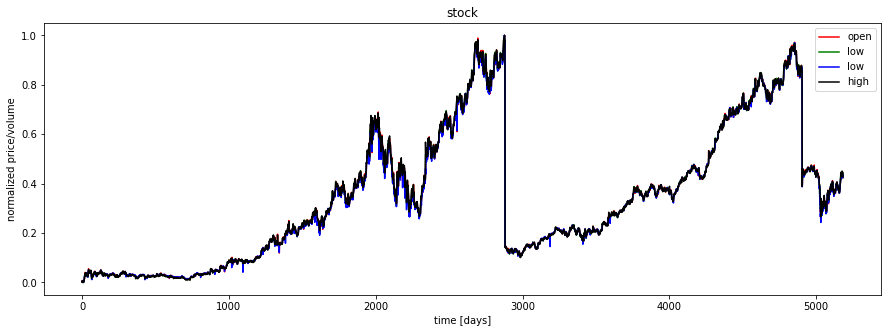

In [44]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.Open.values, color='red', label='open')
plt.plot(df_stock_norm.Close.values, color='green', label='low')
plt.plot(df_stock_norm.Low.values, color='blue', label='low')
plt.plot(df_stock_norm.High.values, color='black', label='high')
#plt.plot(df_stock_norm.Volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

# Model and Validate data

## Basic cells with RNN in tensorflow



In [45]:
index_epoch=0
perm_array = np.arange(X_train.shape[0])
np.random.shuffle(perm_array)

In [46]:
# function to get next batch
def get_next_batch(size):
  global index_epoch, X_train, perm_array
  start = index_epoch
  index_epoch += size

  if index_epoch > X_train.shape[0]:
    np.random.shuffle(perm_array)  # shuffle permutation array
    start = 0
    index_epoch = size

  end = index_epoch
  return X_train[perm_array[start:end]], y_train[perm_array[start:end]]
  

In [47]:
# parameters
n_steps = window-1
n_inputs = 4
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = X_train.shape[0]
test_set_size = X_test.shape[0]

In [55]:
def build_model(input_shape):
  d = 0.2
  model = keras.models.Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        Dropout(d),
        LSTM(128, input_shape=input_shape, return_sequences=False),
        Dropout(d),
        Dense(32, kernel_initializer='uniform', activation='relu'),
        Dense(1, kernel_initializer='uniform', activation='linear')
  ])
  return model

In [56]:
model = build_model(input_shape=(window,5))

NameError: ignored